## Task 2.1: Unsupervised learning - PCA

**Author**: Andre Schomakers

**Date**: 21 Mar 2025

This interactive Python notebook `.ipynb` is used for unsupervised preprocessing for task 2.1 on the `food.csv` dataset, see below:


https://corgis-edu.github.io/corgis/csv/food/

**Sources**:

[[1]](https://www.geeksforgeeks.org/principal-component-analysis-pca/) Geeks for Geeks Article (2025): Principal Component Analysis (PCA). Accessed on: 21 Mar, 2025.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for good coding practices, imports are all stored here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# read csv data with pandas
food = pd.read_csv("food.csv")

### Getting an overview

In [6]:
# check the dataset
food.shape # 25x10
food.info() # check dtypes 

# all values (except for 'Unnamed: 0' are present as float64). 
# # caution: "unnamed: 0" column needs proper naming (I'll take care of that later)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     object 
 1   RedMeat     25 non-null     float64
 2   WhiteMeat   25 non-null     float64
 3   Eggs        25 non-null     float64
 4   Milk        25 non-null     float64
 5   Fish        25 non-null     float64
 6   Cereals     25 non-null     float64
 7   Starch      25 non-null     float64
 8   Nuts        25 non-null     float64
 9   Fr.Veg      25 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB


In [7]:
food.head() # inspect the structure of the data

,Unnamed: 0,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [9]:
# additionally, we can change unique countries as idx
food["Unnamed: 0"].nunique() == len(food) # test if the country name is unique. True => change it as idx 

food.set_index("Unnamed: 0", inplace=True)
food.index.name = "Country"  # Give the idx a more suitable name

In [6]:
# check for missing vals
food.isna().sum().sum()
# this is sufficient: in food.info we can already see "isnull"-objects: every col stores non-null objects

np.int64(0)

In [12]:
food.isna().sum().sum()

np.int64(0)

### Scaling

PCA works best, if the data are scaled see [[1]](https://www.geeksforgeeks.org/principal-component-analysis-pca/). At the moment, the values shift quite a bit (e.g. Cereals for Albania `42.3` vs it's Starch value `0.6`)
We can use the `StandardScaler` from the Sklearn-Package, bringing each variables mean to 0 and each variables standard deviation to 1:

$Z = \frac{X-\mu}{\sigma}$, with µ as the mean per feature and $\sigma$ the standard deviation of each variable

In [14]:
# select only numerical cols
X = food.select_dtypes(include=['float64', 'int64']) # no int present, but added anyways

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # ndarray. convert to pd.DataFrame for better handling:
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)


In [25]:
X_scaled_df.describe() # we can see, that mean ~ 0, std ~ 1

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,-3.730349e-16,3.996803e-17,4.618528e-16,-2.753353e-16,5.329071e-17,-3.907985e-16,1.554312e-16,-8.881784e-18,-1.776357e-17
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00
min,-1.655154e+00,-1.794750e+00,-2.224584e+00,-1.754130e+00,-1.225033e+00,-1.269221e+00,-2.295965e+00,-1.219184e+00,-1.547987e+00
25%,-6.183957e-01,-8.277512e-01,-2.155180e-01,-8.635627e-01,-6.551106e-01,-7.391391e-01,-7.345090e-01,-8.079923e-01,-6.993098e-01
50%,-1.000167e-01,-2.652340e-02,-3.287563e-02,7.009624e-02,-2.651638e-01,-3.950507e-01,2.648230e-01,-3.454013e-01,-1.901036e-01
75%,2.354051e-01,8.023329e-01,6.976939e-01,8.888433e-01,4.547379e-01,7.302114e-01,8.894054e-01,8.367757e-01,4.322595e-01
max,2.491879e+00,1.686446e+00,1.610906e+00,2.382698e+00,2.974394e+00,2.273959e+00,1.389071e+00,2.430145e+00,2.129613e+00


### PCA 
Following code cells perform the actual unsupervised dimensionaly reduction via PCA. 
Why again?: We would like to transform high-dimensional data (not really the case for this example) to lower dimensional space while maximizing the variance of the data in the new space [[1]](https://www.geeksforgeeks.org/principal-component-analysis-pca/).

In [17]:
pca = PCA()

# we apply the pca to our scaled entries!
principal_components = pca.fit_transform(X_scaled)

In [19]:
pca_df = pd.DataFrame(
    data=principal_components[:, 0:2],  # using the first two components
    columns=['PC1', 'PC2'],
    index=X.index
)

Text(0, 0.5, 'Principal Component 2')

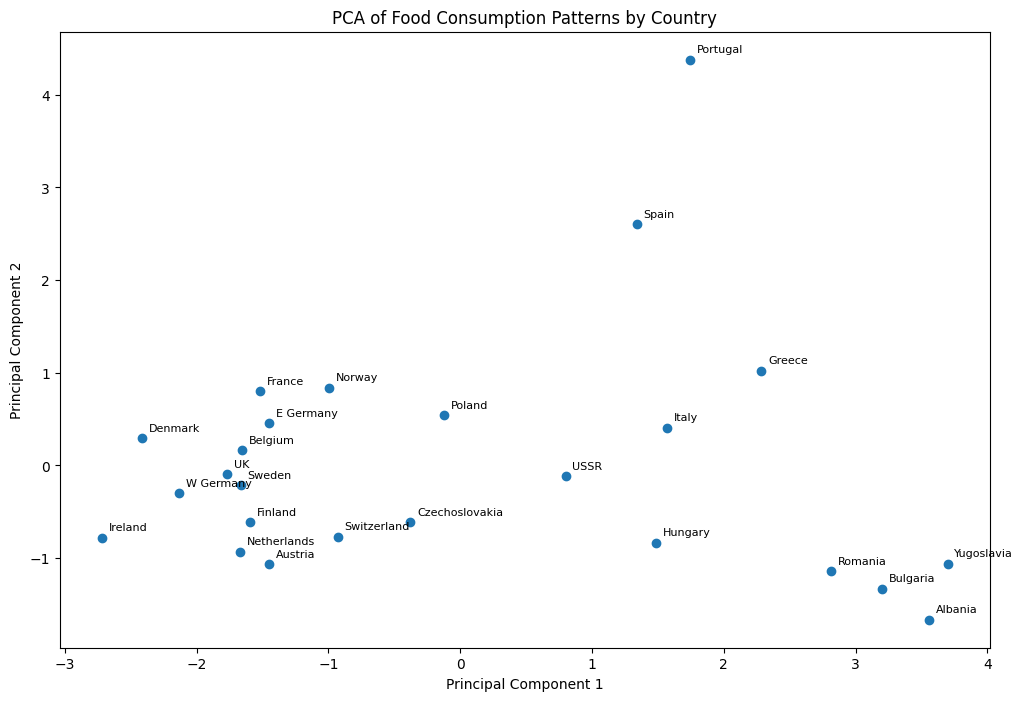

In [20]:
# scatter/score plot (PC1 vs PC2) 
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

# add country labels
for i, country in enumerate(pca_df.index):
    plt.annotate(country, 
                 (pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i]),
                 fontsize=8,
                 xytext=(5, 5),
                 textcoords='offset points')

# title, axes comments
plt.title('PCA of Food Consumption Patterns by Country')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


In the above plot we can clearly see different clusters, using two principal components. 
The country names simplify the assignments to clusters, in the right bottom for example, we have typical east european countries as a cluster. The mediterranean countries are as well close to each other with Portugal being really distinct from all other countries (probably due to highest fish consum compared to all other countries, see df in code cell below). The biggest cluster on the bottom left consists of central european countries.

In [21]:
# comparing the results to the table
food

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5


Comparing both the visual results to the base DataFrame, I would assume that e.g. Portugal stands out that dramatically, as the fish consume is way higher than in any other country.